- https://www.youtube.com/watch?v=8yptHd0JDlw　@youtube by ヨビノリ
- https://www.youtube.com/watch?v=8KhT_TCmLSw @youtube by いまにゅのプログラミング塾

最初この２つを見るのが理解としては早そう

- https://www.youtube.com/watch?v=V4PN2tjEqA8 @youtube by ウマたん

具体例等があまりないので、上２つを先に見たほうがまだ理解出来るかも。実質見なくてもいいとは思った。ウマたんはWebサイトの方がいいかも。

- https://www.youtube.com/watch?v=mmGj9qcFKAM @youtube by AbleProgramming

今回の課題とは関係ない(?)部分も多く、少し難しいかも

- https://diveintocode.slack.com/files/U71KZN0HL/F01N1PXLG94/sprint7____________________________k-means___.pdf @slack by西尾さん

- https://toukei-lab.com/k-means　@Webサイト byウマたん
- https://toukei-lab.com/%e3%82%af%e3%83%a9%e3%82%b9%e3%82%bf%e3%83%bc%e5%88%86%e6%9e%90　@Webサイト byウマたん

In [3]:
# import pandas as pd
# import numpy as np
# from sklearn.datasets import load_iris
# from sklearn.cluster import KMeans
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score

# iris = load_iris()
# df = pd.DataFrame(iris.data, columns=iris.feature_names)
# pred_cluster = KMeans(n_clusters=3).fit_predict(df)
# confusion_matrix(iris.target,pred_cluster)
# accuracy_score(iris.target,pred_cluster)

## 1.このSprintについて

### printの目的
- スクラッチを通してK-meansを理解する
- クラスタ分析を行う

### どのように学ぶか
スクラッチでK-meansを実装した後、それを使用しクラスタ分析を行います。



## 2.K-meansスクラッチ

K-meansのクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


以下に雛形を用意してあります。このScratchKMeansクラスにコードを書き加えていってください。


**《雛形》**

In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [175]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装
    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = 4
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        
    def centring(self, X):
        clusters = np.random.randint(0, self.n_clusters, X.shape[0])
        centroids = np.array([X[clusters == n, :].mean(axis = 0) for n in range(self.n_clusters)])
        return centroids


    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        
        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        return

### クラスタリングのための人工データセット
クラスタリングを実験するための人工データセットを作成するコードを用意しています。


このmake_blobs関数は正解ラベルも出力してますが、今回は使用しません。使用しないことを明示するために、 _（アンダースコア） で受け取っています。


**《シンプルデータセット3》**

In [154]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [37]:
print(X.shape)
print(type(X))
print(X)

(100, 2)
<class 'numpy.ndarray'>
[[ 0.72086751  3.71347124]
 [-1.89468423  7.96898545]
 [ 1.35678894  4.36462484]
 [ 1.05374379  4.49286859]
 [ 1.59141542  4.90497725]
 [ 0.78260667  4.15263595]
 [-1.95751686  3.87291474]
 [-0.77354537  7.87923564]
 [ 0.12313498  5.27917503]
 [-1.43284669  7.71577043]
 [-0.92819001  7.02698199]
 [-1.74836345  7.06307447]
 [-1.26789718  7.25141327]
 [-0.98661744  7.74968685]
 [-0.81984047  7.50994722]
 [ 2.99684287  0.22378413]
 [ 1.46870582  1.86947425]
 [-0.33533163  3.390122  ]
 [-1.86407034  2.93379754]
 [ 2.62496786  0.28025075]
 [ 2.11114739  3.57660449]
 [-1.8219901   7.61654999]
 [-1.91186205  3.18750686]
 [ 2.28809874  0.12954182]
 [ 0.5285368   4.49723858]
 [-1.57613028  2.58614312]
 [-0.565433    3.65813966]
 [ 0.802314    4.38196181]
 [ 2.79939362  1.84560825]
 [ 2.64465731  0.80770124]
 [ 1.7190373   0.71788708]
 [-0.93564005  7.03443119]
 [ 2.14398059  0.69677319]
 [ 2.06051753  1.79059891]
 [-1.21986433  3.3789856 ]
 [ 1.13280393  3.87673

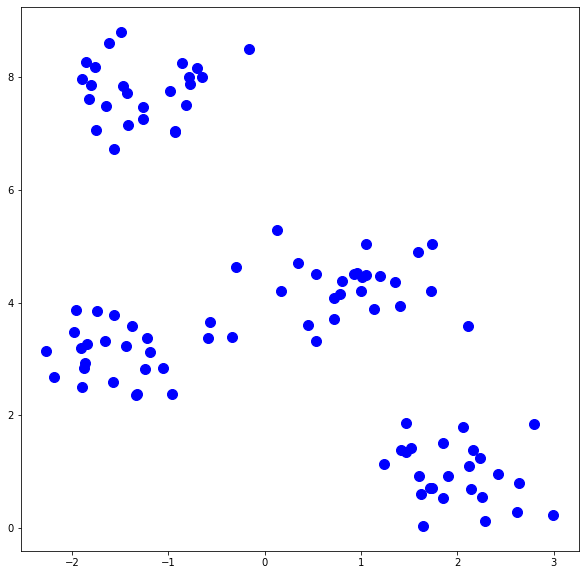

In [41]:
def plot_dataset(X):
    plt.plot(X[:, 0], X[:, 1], 'bo', ms =10)
plt.figure(figsize=(10, 10))
plot_dataset(X)
plt.show()

### 学習
K-meansの学習に必要な要素を順番に作成していきます。

## 【問題1】中心点の初期値を決める
入力されたデータから $K$ 個の中心点 $μ_1$ から $μ_K$ の初期値を決めるコードを作成してください。$K$ は指定したクラスタ数です。

最もシンプルな初期値の決定方法は、データ点 $X_n$ の中からランダムに $K$ 個選ぶことです。今回はこれを実装してください。

K-meansの学習結果は中心点 $μ$ の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。

#### 参考サイト

- https://algorithm.joho.info/programming/python/numpy-random-choice/

In [155]:
n_clusters = 4
clusters = np.random.randint(0, n_clusters, X.shape[0])
clusters

array([1, 2, 3, 2, 0, 2, 2, 0, 2, 1, 2, 2, 0, 1, 1, 3, 1, 0, 1, 3, 2, 0,
       2, 0, 0, 2, 2, 2, 0, 1, 1, 1, 0, 3, 0, 0, 1, 2, 3, 0, 2, 1, 0, 0,
       1, 2, 2, 2, 2, 3, 3, 2, 1, 0, 0, 0, 3, 3, 3, 3, 2, 2, 1, 2, 1, 2,
       1, 0, 1, 3, 0, 0, 1, 2, 3, 2, 2, 2, 2, 0, 1, 0, 3, 0, 0, 1, 3, 3,
       2, 3, 0, 3, 0, 2, 0, 0, 0, 0, 0, 3])

In [168]:
def centring(X):
    n_clusters = 4
    clusters = np.random.randint(0, n_clusters, X.shape[0])
    centroids = np.array([X[clusters == n, :].mean(axis = 0) for n in range(n_clusters)])
    return centroids
centring(X)

array([[ 0.08349977,  3.47049971],
       [-0.26683082,  4.69091069],
       [ 0.37810287,  4.25930962],
       [ 0.03384256,  4.02475912]])

In [203]:
# n_clusters =4
# n_init = 1
# def centering(X):
#     center_points =[np.random.choice(X.reshape(-1), n_clusters, replace =False) for i in range(n_init)]
#     return center_points
# centering(X)

## 【問題2】SSEを求める関数の作成
クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。

K-meansはこのSSEを最小化する $r_{nk}$ と $μ_k$ を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。

$$
SSE=\sum^{N}_{n=1}\sum^{K}_{k=1}r_{nk} ∥X_n−μ_k∥^2
$$

$n$ : データ点のインデックス

$k$ : クラスタのインデックス

$X_n$ : $n$番目のデータ点

$μ_k$ : $k$番目の中心点

$r_{nk}$ : データ点$X_n$がクラスタ $k$ に所属していたら1、そうでなければ0

### クラスタの割り当てと中心点の移動を繰り返す
K-meansの学習の基本は以下の2つのフェーズを繰り返すことです。

- 中心点 $μ_k$ を固定した上で SSE を最小化する クラスタの割り当て $r_{nk}$ を選ぶ。
- クラスタの割り当て $r_{nk}$ を固定した上で SSE を最小化する 中心点 $μ_k$ を選ぶ。

最初の中心点 $μ_k$ は問題1で作成した初期値です。


順番に見ていきます。

#### 参考サイト
- https://qiita.com/panda531/items/4b5504a3949eacb7ab19
- https://qiita.com/navitime_tech/items/bb1bd01537bc2713444a

In [211]:
for c in centroids:
    sse =((X-c)**2)
    print(len(sse))

100
100
100
100


## 【問題3】クラスタへの割り当て
全てのデータ点 $X_n$ を最も近い中心点 $μ_k$ に割り当てるコードを作成してください。

K-menasにおける 近い とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル $p,q$ に対しては以下の数式で表現できます。

$$
∥q−p∥=\sqrt{(q−p)⋅(q−p)}
$$

NumPyにはこの関数がnp.linalg.normとして用意されているため使用してください。


numpy.linalg.norm — NumPy v1.17 Manual(下記URL)

https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html


中心点 $μ_k$ を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

## 【問題4】中心点の移動
中心点 $μ_k$ を $k$ 番目のクラスタに割り当てられる全てのデータ点 $X_n$ の平均値（重心）に移動するコードを作成してください。

クラスタの割り当て $r_{nk}$ を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

## 【問題5】繰り返し
クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成してください。


次のどれかの条件を満たしたらこれを止めます。


- 繰り返しが指定した回数に到達する。（雛形では引数max_iter）
- 中心点 $μ_k$ と重心の差の合計が指定した許容値以下になる。（雛形では引数tol）

## 【問題6】異なる初期値で計算
問題5の繰り返しを、指定した回数初期値を変更して計算するコードを作成してください。回数は雛形では引数n_initで指定します。


複数計算した中でSSEが最小になったものが最終的な学習結果となるため、その時の中心点 $μ_k$ を保持しておきます。

## 【問題7】推定
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。


- データ点 $X_n$ と学習で決まった中心点 $μ_k$ に対し、 SSE を最小化する $r_{nk}$ を選ぶ。

具体的には次のことです。


- データ点 $X_n$ を最も近い $μ_k$ に割り当てる。


## 【問題8】エルボー法の実装
K-meansにおいて中心点の個数 $k$ は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数 $k$ を検討するためのコードを作成してください。


SSEを縦軸、クラスタ数 $k$ を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

In [212]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
n_clusters = 4
clusters = np.random.randint(0, n_clusters, X.shape[0])
max_iter = 300

for _ in range(max_iter):
    centroids = np.array([X[clusters == n, :].mean(axis = 0) for n in range(n_clusters)])
    new_clusters = np.array([np.linalg.norm(X - c, axis = 1) for c in centroids]).argmin(axis = 0) 
    for n in range(n_clusters):
            if not np.any(new_clusters == n):
                centroids[n] = X[np.random.choice(X.shape[0], 1), :]
    if np.allclose(clusters, new_clusters):
            break
        
clusters = new_clusters
clusters

array([0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 0, 1,
       2, 3, 0, 2, 2, 0, 3, 3, 3, 1, 3, 3, 2, 0, 1, 3, 1, 2, 0, 2, 1, 2,
       2, 1, 3, 2, 0, 3, 1, 3, 2, 2, 3, 1, 1, 3, 3, 1, 1, 3, 3, 0, 3, 1,
       2, 3, 3, 0, 1, 3, 0, 1, 0, 0, 2, 2, 3, 3, 3, 1, 2, 0, 3, 2, 3, 3,
       0, 0, 0, 3, 3, 2, 2, 1, 1, 2, 1, 1])

## 【問題9】（アドバンス課題）シルエット図
$k$ を決める助けになるものとしてシルエット図もあります。シルエット図を表示するコードを作成してください。


Matplotlibを使い図を表示するコードは用意しました。以下を与えてください。


silhouette_vals : shape(n_samples,)のndarray、各データ点のシルエット係数


silhouette_avg : float、シルエット係数の平均値


y_km : shape(n_samples,)のndarray、各データ点のクラスタラベル名


cluster_labels : list、クラスタのラベル名のリスト


n_clusters : int、クラスタ数


$n$ 番目のデータ点に対するシルエット係数 $s_n$ は以下の数式でを求められます。この数式を実装し、シルエット図を確認してください。

$$
s_n=\frac{b_n−a_n}{max(b_n,a_n)}
$$

$a_n$ : 凝集度。同じクラスタ内の他のデータ点との距離の平均値。


$b_n$ : 乖離度。最も近い他のクラスタ内の全てのデータ点との距離の平均値。


乖離度 $b$ が大きく、凝集度 $a$ が小さい時が理想的であり、シルエット係数 $s$ は1に近くなります。


**《シルエット図を表示するためのコード》**

In [3]:
from matplotlib import cm
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

NameError: name 'cluster_labels' is not defined

## 3.クラスタ分析

### 卸売業者のデータ分析
クラスタリングを利用法を学ぶために、Wholesale customers Data Setを使用します。


UCI Machine Learning Repository: Wholesale customers Data Set(下記URL)
https://archive.ics.uci.edu/ml/datasets/Wholesale+customers


Data Folderの中からWholesale customers data.csvをダウンロードしてください。これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。顧客は小売店やレストランです。RegionとChannelは取り覗き、金額のデータでK-meansを利用します。


### 次元削減
金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください。


**《PCAのサンプルコード》**

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

NameError: name 'data' is not defined

**《PCAの分散説明率を表示するコードサンプル》**

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

NameError: name 'data' is not defined

## 【問題10】クラスタ数kの選択
最適だと思われるクラスタ数 $k$ を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

## 【問題11】既知のグループとの比較
RegionとChannelはK-meansに使用しなかったが、これれらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。

## 【問題12】卸売業者にとって有益な情報
卸売業者にとって有益な情報を探し出し文章にまとめてください。


**《ヒント》**


前処理を行う前のデータを使い、各クラスタの要約統計量を見るなどしてみましょう。また、PCAで次元削減したデータに対してK-meansを使用しましたが、6個の特徴量をそのまま使ったり、一部の特徴量のみを使ったりということも試してみてください。既知のグループとの比較結果も参考にしてください。


条件ごとにデータを見る際にはPandasのgroupbyが便利です。


pandas.DataFrame.groupby — pandas 0.23.4 documentation(下記URL)
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html

## 4.他の非階層クラスタリング手法

## 【問題13】（アドバンス課題）他の手法の調査
今回扱ったK-means以外に非階層クラスタリングで有名な手法としては **DBSCAN** 、
PCA以外に次元削減手法で有名な手法としては **t-SNE** や **LLE** があります。


- DBSCANのメリット・デメリット
- t-SNE、LLEのメリット・デメリット

について記述してください。



## 【問題14】（アドバンス課題）t-SNEとDBSCANの利用
Wholesale customersのデータに対して、PCAではなく、 **t-SNE** を用いて次元削減をしてください。さらにK-meansではなく、 **DBSCAN** を用いてクラスタリングしてください。


そのクラスタリング結果をPCA+kmeansの場合の結果と比較してみましょう。実装にはscikit-learnを用いてください。


sklearn.manifold.TSNE — scikit-learn 0.20.2 documentation(下記URL)
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html


sklearn.cluster.DBSCAN — scikit-learn 0.20.2 documentation(下記URL)
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html


**《パラメーターチューニング》**


これらはK-meansやPCAに比べパラメーターチューニングが難しい手法です。scikit-learnのドキュメントと共に論文も参考にしながらパラメータの意味を確認することも大切になります。


t-SNEの論文(下記URL)
http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf


DBSCANの論文(下記URL)

https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf